In [1]:
using PyPlot
using Distributions
using LinearAlgebra

# Entropy

確率分布$p(\mathbf x)$に対する下記の期待値がエントロピー

エントロピーが大きい方が確率分布から生じる変数の「予測のしにくさ」を表す

\begin{equation}\begin{aligned}
\mathrm{H}[p(\mathbf{x})] &=-\int p(\mathbf{x}) \ln p(\mathbf{x}) \mathrm{d} \mathbf{x} \\
&=-\langle\ln p(\mathbf{x})\rangle_{p(\mathbf{x})}
\end{aligned}\end{equation}

# Cross Entropy

$p(\mathbf x)$は真の確率分布、$q(\mathbf x)$は推定した確率分布 \
$p(\mathbf x)$と$q(\mathbf x)$の確率分布が似ていると交差エントロピー誤差は小さくなり、似ていないと交差エントロピー誤差は大きくなる

\begin{equation}\begin{aligned} \mathrm H[p(\mathbf x), q(\mathbf x)] &=-\int q(\mathbf x) \ln p(\mathbf x) \\
&=-\langle\ln p(\mathbf{x})\rangle_{q(\mathbf{x})}
\end{aligned}\end{equation}

真の確率分布$p(\mathbf x)$からのサンプルが (1, 0, 0)


推定した確率分布$q(\mathbf x)$が ( 0.8, 0.1, 0.1) の場合、\
交差エントロピー誤差は
$$
\begin{aligned}
\mathrm H(p, q) &=-(1 * \log 0.8+0 * \log 0.1+0 * \log 0.1) \\
&=-(\log 0.8) \\
&=-(-0.09) \\
&=0.09
\end{aligned}
$$
一方、推定した確率分布 $q(\mathbf x)$が (0.3, 0.4, 0.3)の場合、\
交差エントロピー誤差は
$$
\begin{aligned}
\mathrm H(p, q) &=-(1 * \log 0.3+0 * \log 0.4+0 * \log 0.3) \\
&=-(\log 0.3) \\
&=-(-0.52) \\
&=0.52
\end{aligned}
$$
交差エントロピー誤差は後者よりも前者の方が小さくなっており、真の確率分布$p(\mathbf x)$に近いのは 前者の確率分布 $q(\mathbf x)$ である

参照　[交差エントロピー誤差をわかりやすく説明してみる](https://qiita.com/kenta1984/items/59a9ef1788e6934fd962)


# KL divergence

2つの分布$p(\mathbf x)$と$q(\mathbf x)$の隔たりを表す尺度 \
複雑な$p(\mathbf x)$を単純化、もしくは扱いやすくしたのが$q(\mathbf x)$である\
$p(\mathbf x)$を$q(\mathbf x)$に置き換えた場合にエントロピーにどのくらい差が生じるのか \
$p(\mathbf x)$から$q(\mathbf x)$へ代替してもよいかの判断指標となる

\begin{align}
KL[q(\mathbf x)\| p(\mathbf x)] &= -\int q(\mathbf x) \ln \frac{p(\mathbf x)}{q(\mathbf x)}d \mathbf x \\
&= \left \langle  \ln q(\mathbf x) \right \rangle _{q(\mathbf x)} - \left \langle \ln p(\mathbf x) \right \rangle _{q(\mathbf x)} 
\end{align}

<div style="text-align: center;">
等号が成り立つのは$p(\mathbf x) = q(\mathbf x)$が成り立つとき
</div>


参照 [エントロピーからKLダイバージェンスまでの話](https://www.hellocybernetics.tech/entry/2016/04/21/132645)

# 変分近似

複雑な確率分布を$p\left(z_{1}, z_{2}, z_{3}\right)$を簡単な$q\left(z_{1}, z_{2}, z_{3}\right)$で近似 

\begin{equation}q_{\mathrm{opt}}\left(z_{1}, z_{2}, z_{3}\right)=\underset{q}{\operatorname{argmin}} \mathrm{KL}\left[q\left(z_{1}, z_{2}, z_{3}\right) \| p\left(z_{1}, z_{2}, z_{3}\right)\right]\end{equation}

ただし、$q\left(z_{1}, z_{2}, z_{3}\right)$のままで、
KLを解くと$q_{\mathrm{opt}} \left(z_{1}, z_{2}, z_{3}\right)=p\left(z_{1}, z_{2}, z_{3}\right)$
となってしまうため、
$q \left(z_{1}, z_{2}, z_{3}\right)\approx q(z_{1})q(z_{2})q(z_{3})$
とし、各近似分布$q(z_{1})q(z_{2})q(z_{3})$を1つずつ修正していく。
$q(z_{1})q(z_{2})q(z_{3})$で近似した場合、変数間の依存関係は失われる

\begin{equation}\therefore q_{\text {opt. }}\left(z_{1}\right)=\underset{q\left(z_{1}\right)}{\operatorname{argmin}} \mathrm{KL}\left[q\left(z_{1}\right) q\left(z_{2}\right) q\left(z_{3}\right) \| p\left(z_{1}, z_{2}, z_{3}\right)\right]\end{equation}

\begin{equation}\begin{array}{l}
\mathrm{KL}\left[q\left(z_{1}\right) q\left(z_{2}\right) q\left(z_{3}\right) \| p\left(z_{1}, z_{2}, z_{3}\right)\right] \\
=-\left\langle\ln \frac{p\left(z_{1}, z_{2}, z_{3}\right)}{q\left(z_{1}\right) q\left(z_{2}\right) q\left(z_{3}\right)}\right\rangle_{1,2,3} \\
=-\left\langle\left\langle\ln \frac{p\left(z_{1}, z_{2}, z_{3}\right)}{q\left(z_{1}\right) q\left(z_{2}\right) q\left(z_{3}\right)}\right\rangle_{2,3}\right\rangle_{1} \\
=-\left\langle\left\langle\ln p\left(z_{1}, z_{2}, z_{3}\right)\right\rangle_{2,3}-\left\langle\ln q\left(z_{1}\right)\right\rangle_{2,3}\right. \\
\left.\quad-\left\langle\ln q\left(z_{2}\right)\right\rangle_{2,3}-\left\langle\ln q\left(z_{3}\right)\right\rangle_{2,3}\right\rangle_{1} \\
=-\left\langle\left\langle\ln p\left(z_{1}, z_{2}, z_{3}\right)\right\rangle_{2,3}-\ln q\left(z_{1}\right)\right\rangle_{1}+\text { const. } \\
=-\left\langle\ln \frac{\exp \left\{\left\langle\ln p\left(z_{1}, z_{2}, z_{3}\right)\right\rangle_{2,3}\right\}}{q\left(z_{1}\right)}\right\rangle_{1}+\text { const. } \\
=\mathrm{KL}\left[q\left(z_{1}\right) \| \exp \left\{\left\langle\ln p\left(z_{1}, z_{2}, z_{3}\right)\right\rangle_{2,3}\right\}\right]+\text { const. }
\end{array}\end{equation}

等号が成り立つのは、\begin{equation}\ln q\left(z_{1}\right)=\left\langle\ln p\left(z_{1}, z_{2}, z_{3}\right)\right\rangle_{q\left(z_{2}\right) q\left(z_{3}\right)}+\text { const. }\end{equation}

## 変分近似のプロセス
1. $q\left(z_{2}\right)$,$q\left(z_{3}\right)$ をランダムに初期化する。
2. $q\left(z_{2}\right)$,$q\left(z_{3}\right)$ を固定し、KL divergenceを最小化する $q\left(z_{1}\right)$ を求める。
3. $q\left(z_{1}\right)$,$q\left(z_{3}\right)$ を固定し、KL divergenceを最小化する $q\left(z_{2}\right)$ を求める。
3. $q\left(z_{1}\right)$,$q\left(z_{2}\right)$ を固定し、KL divergenceを最小化する $q\left(z_{3}\right)$ を求める。
4. 以上の2，3, 4を十分な回数まで綠り返す。

### 変分近似の使用例
-2変量ガウス分布のKL divergence

\begin{align}
KL[q(\mathbf x)\|p(\mathbf x)] &= \left \langle  \ln q(\mathbf x) \right \rangle _{q(\mathbf x)} - \left \langle \ln p(\mathbf x) \right \rangle _{q(\mathbf x)} 
\end{align}

\begin{align}
\mathcal N(\mathbf x \mid \boldsymbol \mu, \mathbf {\Sigma})&=\frac{1}{\sqrt{(2 \pi)^{D}|\mathbf{\Sigma}|}} \exp \left\{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\top} \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right\} \\
  & \propto  \exp \left\{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\top} \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right\} \\
\end{align} 

\begin{align}
\mathcal N( x_1, x_2 \mid \mu_1,\mu_2, \mathbf {\Sigma}) & \propto  \exp \left\{-\frac{1}{2}\left[\begin{array}{rr} x_{1} -\mu_{1} \\x_{2}- \mu_{2} \end{array}  \right] ^{\top}  \left[\begin{array}{rr} \Lambda_{11}  & \Lambda_{12} \\ \Lambda_{21}  & \Lambda_{22} \end{array}\right] \left[\begin{array}{rr} x_{1} -\mu_{1} \\x_{2}- \mu_{2} \end{array}  \right] \right\} \\
\end{align}


\begin{align}
\ln q\left(x_{1}\right)&=\left\langle\ln p\left(x_{1}, x_{2} \mid x\right)\right\rangle_{q\left(x_{2}\right)}+\mathrm{const.} \\
&= \left \langle-\frac{1}{2}\left[\begin{array}{rr} x_{1} -\mu_{1} \\x_{2}- \mu_{2} \end{array}  \right] ^{\top}  \left[\begin{array}{rr} \Lambda_{11}  & \Lambda_{12} \\ \Lambda_{21}  & \Lambda_{22} \end{array}\right] \left[\begin{array}{rr} x_{1} -\mu_{1} \\x_{2}- \mu_{2} \end{array}  \right] \right \rangle _{q\left(x_{2}\right)}+\mathrm{const.} \\
&= \left \langle -\frac{1}{2}\left\{(x_1 - \mu_1)^2\Lambda_{11} +( x_1 - \mu_1)( x_2 - \mu_2)\Lambda_{12} + +( x_1 - \mu_1)( x_2 - \mu_2)\Lambda_{21} +(x_2 - \mu_2)^2\Lambda_{22}  \right\}\right\rangle_{q\left(x_{2}\right)}+\mathrm{const.} \\
&= \left \langle -\frac{1}{2}\left\{x_1 ^2\Lambda_{11} -2x_1(\Lambda_{11} \mu - \Lambda_{12}(x_2 - \mu_2))\right\}\right\rangle_{q\left(x_{2}\right)}+\mathrm{const.} \\
&=  -\frac{1}{2}\left\{x_1 ^2\Lambda_{11} -2x_1(\Lambda_{11} \mu - \Lambda_{12}(\langle x_2 \rangle - \mu_2))\right\}
+const. \\
\end{align}



$$
\therefore
q\left(x_{1}\right)=\mathcal{N}\left(x_{1} \mid m_{1}, \Lambda_{11}^{-1}\right)
$$
ただし、
$$
m_{1}=\left\langle x_{1}\right\rangle=\mu_{1}-\Lambda_{11}^{-1} \Lambda_{1,2}\left(\left\langle x_{2}\right\rangle-\mu_{2}\right)
$$


ここで、一般的なガウス分布\begin{equation}\mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}, \mathbf{\Sigma})\end{equation}の指数部分が
\begin{equation}-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\mathrm{T}} \mathbf{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})=-\frac{1}{2} \mathbf{x}^{\mathrm{T}} \mathbf{\Sigma}^{-1} \mathbf{x}+\mathbf{x}^{\mathrm{T}} \mathbf{\Sigma}^{-1} \boldsymbol{\mu}+\mathrm{const.}\end{equation}
を利用

参照 [変分近似（Variational Approximation）の基本（２）](http://machine-learning.hatenablog.com/entry/2016/01/23/130017)

- 多変量正規分布の基本的な期待値

\begin{align}
\left \langle \mathbf{x} \right \rangle &= \boldsymbol{\mu} \\
\left \langle \mathbf{xx}^T \right \rangle &= \boldsymbol{\mu \mu}^T +\mathbf{\Sigma} \\
\end{align}

\begin{align}
\because
\mathbf{\Sigma} &= \left \langle (\mathbf{x} - \langle  \mathbf{x}  \rangle)(\mathbf{x} -  \langle \mathbf{x} \rangle)^T \right \rangle \\
&=\left \langle \mathbf x \mathbf x^T - \mathbf x \langle \mathbf x ^T \rangle - \langle \mathbf x  \rangle  \mathbf x ^T  +  \langle \mathbf x  \rangle \langle \mathbf x ^T \rangle \right \rangle\\
&=\langle \mathbf{xx}^T \rangle - \langle \mathbf{x} \rangle \langle \mathbf{x}^T  \rangle \\
\end{align}

- 多変量正規分布のKL divergence

\begin{align}
p(x)  &\sim \mathcal N(\mu_1, \Sigma_1) \\
q(x)  &\sim \mathcal N(\mu_2, \Sigma_2)
\end{align}

\begin{aligned}
&D_{KL}[q(x) \| p(x)] \\
&=- \int q(x) \log {p(x) \over q(x)} dx \\
&= \int q(x)[ \log q(x) - \log p(x)] dx \\
&= \int q(x)[ 
-{d \over 2}\log 2\pi -{ 1 \over 2} \log |\Sigma_2| -{ 1 \over 2} (\boldsymbol{x}-\boldsymbol{\mu}_2)^T\Sigma_2^{-1}(\boldsymbol{x}-\boldsymbol{\mu}_2) \\
&\quad\quad\quad\quad +{d \over 2}\log 2\pi +{ 1 \over 2} \log |\Sigma_1| +{ 1 \over 2} (\boldsymbol{x}-\boldsymbol{\mu}_1)^T\Sigma_1^{-1}(\boldsymbol{x}-\boldsymbol{\mu}_1) 
] dx \\
&= {1 \over 2}\log {|\Sigma_1| \over |\Sigma_2|} -{1 \over 2} 
\mathbf{E}_{q(x)}[(\boldsymbol{x}-\boldsymbol{\mu}_2)^T\Sigma_2^{-1}(\boldsymbol{x}-\boldsymbol{\mu}_2) ]
+{1 \over 2} 
\mathbf{E}_{q(x)}[(\boldsymbol{x}-\boldsymbol{\mu}_1)^T\Sigma_!^{-1}(\boldsymbol{x}-\boldsymbol{\mu}_1) ]
\\
&= {1 \over 2}\log {|\Sigma_1| \over |\Sigma_2|} -{1 \over 2} d
+{1 \over 2} 
\mathbf{E}_{q(x)}[(\boldsymbol{x}-\boldsymbol{\mu}_2)^T\Sigma_1^{-1}(\boldsymbol{x}-\boldsymbol{\mu}_2) ]    
\\
&= {1 \over 2}\log {|\Sigma_1| \over |\Sigma_2|} -{1 \over 2} d
+{1 \over 2} 
{\rm Tr}(\Sigma_2\Sigma_1^{-1}) + 
(\boldsymbol{\mu}_1 -\boldsymbol{\mu}_2)^T\Sigma_1^{-1}(\boldsymbol{\mu}_1-\boldsymbol{\mu}_2)
\quad 
\\
&= {1 \over 2}\left[ \log {|\Sigma_1| \over |\Sigma_2|} - d + 
(\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)^T \Sigma_1^{-1} (\boldsymbol{\mu}_1 - \boldsymbol{\mu}_2)+ {\rm Tr} (\Sigma_2 \Sigma_1^{-1}) \right]
\end{aligned}

参照 [多変量正規分布の場合のKullback Leibler Divergenceの導出](https://qiita.com/kenmatsu4/items/c107bd51503462fb677f)

In [2]:
function calc_KL(μ₁, λ₁, μ₂, λ₂)
    D = size(μ₁, 1)
    KL = (1/2) * (logdet(λ₁) - logdet(λ₂) - D + (μ₁ - μ₂)' * λ₁ * (μ₁ - μ₂)) .+ (tr(λ₂ * inv(λ₁)))
    return KL[1]
end

calc_KL (generic function with 1 method)

In [3]:
function plot_results(result, truth)
    N = size(result, 1)
    H = Int(ceil(sqrt(N)))
    W = Int(ceil(N / H))
    for i in 1:H
        for j in 1:W
            n = (i - 1) * W + j
            if n <= N
                title("$n of $N")
                plot_gaussian(truth[1], truth[2], "b", "\$p(z)\$")
                plot_gaussian(result[n][1], result[n][2], "r", "\$p(z)\$")
            end
        end    
    end
end

plot_results (generic function with 1 method)

In [4]:
function plot_gaussian(μ, λ, col, label)
    res = 100
    plot(μ[1], μ[2], "x", color=col)
    
    F = eigen(λ)
    vec = F.vectors
    val = F.values
    dw = 2 * pi/res
    w = dw * (0 : res)
    c = 1.0
    a = sqrt(c*val[1])
    b = sqrt(c*val[2])
    P1 = a*cos.(w)
    P2 = b*sin.(w)
    P = μ .+ vec'*vcat(P1', P2')
    plot(P[1, :], P[2, :], "-", color=col, label=label)
end

plot_gaussian (generic function with 1 method)

In [5]:
function main_VI()
    D = 2
    θ = 2.0 * pi / 12

    A = [cos(θ) -sin(θ);
        sin(θ) cos(θ)]
    μ = [0.0, 0.0]
    λ = inv(A * inv([1 0; 0 10])* A')
    μₕ = [-0.5, 0.3]
    λₕ = zeros(D, D)

    max_iter = 100
    KL = NaN * Array{Float64}(undef, max_iter)
    result = Array{Any}(undef, max_iter)

    for i in 1:max_iter
        μₕ[1] = μ[1] - inv(λ[1, 1]) * λ[1, 2] * (μₕ[2] - μ[2])
        λₕ[1, 1] = λ[1, 1]
        μₕ[2] = μ[2] - inv(λ[2, 2]) * λ[2, 1] * (μₕ[1] - μ[1])
        λₕ[2, 2] = λ[2, 2]
        KL[i] = calc_KL(μₕ, λₕ, μ, λ)
        result[i] = [deepcopy(μₕ), deepcopy(inv(λₕ))]
    end
    figure("result per iteration VI")
    clf()
    plot_results(result, (μ, inv(λ)))

    figure("result VI")
    clf()
    plot_gaussian(μ, inv(λ), "b", "\$p(\\bf{z})\$")
    plot_gaussian(result[end][1], result[end][2], "r", "\$q(\\bf{z})\$")

    xlabel("\$z_1\$", fontsize=20)
    ylabel("\$z_2\$", fontsize=20)
    legend(fontsize=16)


    figure("KL divergence VI")
    clf()
    plot(1:max_iter, KL)
    ylabel("KL divergence", fontsize=16)
    xlabel("iteration", fontsize=16)


    show()
end

main_VI (generic function with 1 method)

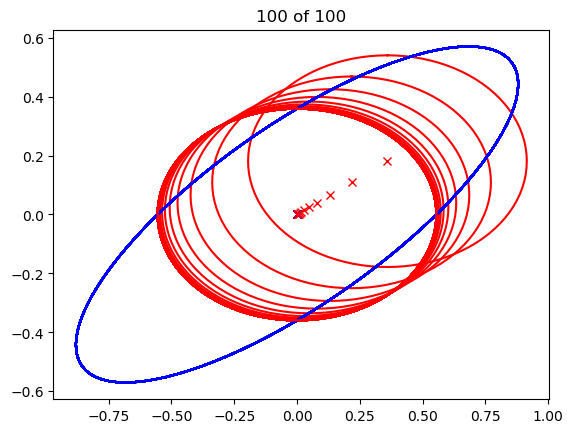

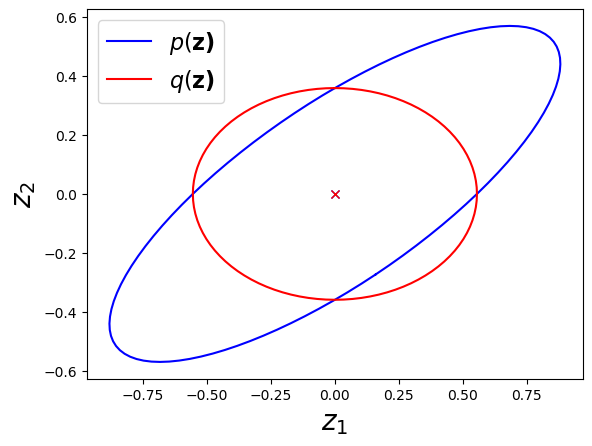

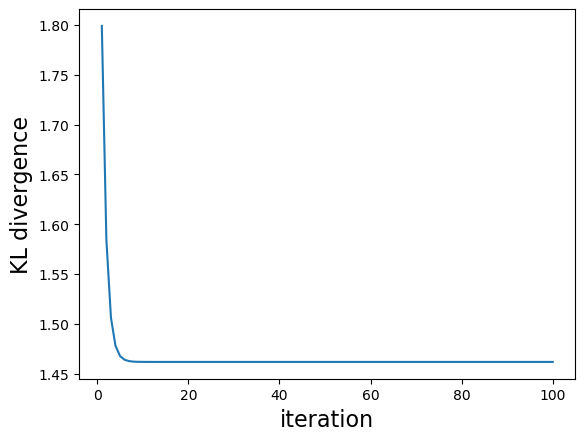

In [6]:
main_VI()

In [7]:
function plot_lines(X)
    D, N = size(X)
    X_d = zeros(D, 2*N + 1)
    X_d[:,1] = X[:,1]
    for i in 1 : N
        X_d[1, 2*i - 1] = X[1, i]
        X_d[1, 2*i] = X[1, i]
        X_d[2, 2*i] = X[2, i]
        X_d[2, 2*i + 1] = X[2, i]
    end
    plot(X[1,:], X[2,:], "oy")
    plot(X_d[1,1:2*N], X_d[2,1:2*N], "--y")
end


plot_lines (generic function with 1 method)

In [8]:
function main_GS()
    D = 2
    θ = 2.0 * pi / 12

    A = [cos(θ) -sin(θ);
        sin(θ) cos(θ)]
    μ = [0.0, 0.0]
    λ = inv(A * inv([1 0; 0 10])* A')


    max_iter = 1000
    X = randn(D, max_iter)
    μₕ = randn(D)
    KL = NaN * Array{Float64}(undef, max_iter)

    for i in 2:max_iter
        μₕ[1] = μ[1] - inv(λ[1, 1]) * λ[1, 2] * (X[2, i-1] - μ[2])
        X[1, i] = rand(Normal(μₕ[1], sqrt(inv(λ[1, 1]))))

        μₕ[2] = μ[2] - inv(λ[2, 2]) * λ[2, 1] * (X[1, i-1] - μ[1])
        X[2, i] = rand(Normal(μₕ[2], sqrt(inv(λ[2, 2]))))

        if i > D
            KL[i] = calc_KL(mean(X[:, 1:i], dims=2), inv(cov(X[:, 1:i], dims=2)), μ, λ)
        end
    end

    μₑ = mean(X, dims=2)
    σₑ = cov(X, dims=2)

    figure("samples GS")
    clf()
    plot_lines(X)
    plot_gaussian(μ, inv(λ), "b", "\$p(\\bf{z})\$")
    plot_gaussian(μₑ, σₑ, "r", "\$q(\\bf{z})\$")
    xlabel("\$z_1\$", fontsize=20)
    ylabel("\$z_2\$", fontsize=20)
    legend(fontsize=16)

    figure("KL divergence (GS)")
    clf()
    plot(1:max_iter, KL)
    ylabel("KL divergence", fontsize=16)
    xlabel("sample size", fontsize=16)
    show()
end

main_GS (generic function with 1 method)

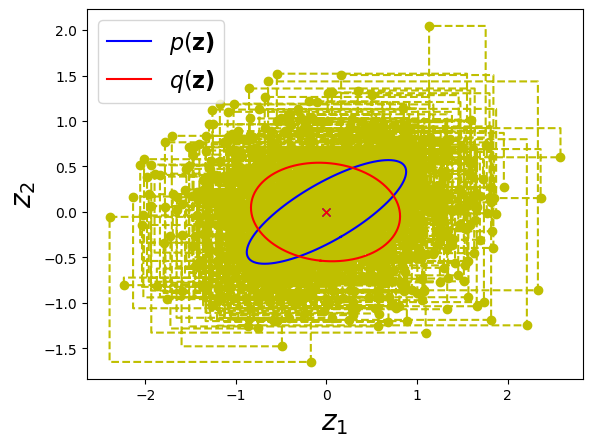

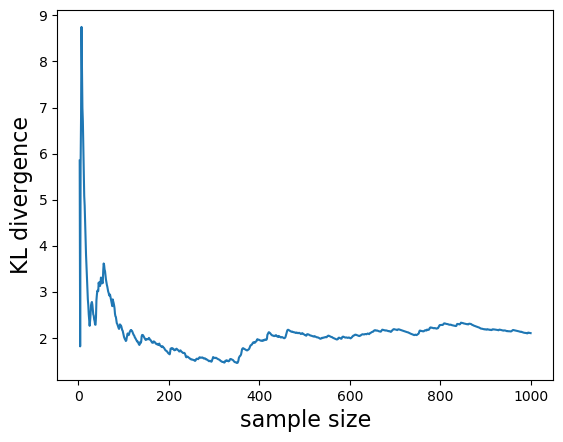

In [9]:
main_GS()